MANAGING DATA

Import dataset as Pandas DataFrame

Import Library

In [74]:
import pandas as pd

In [75]:
import numpy as np

In [76]:
import matplotlib.pyplot as plt

In [77]:
import seaborn as sns

Import Dataset

In [78]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [79]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [80]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [82]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [83]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Remove missing values

In [84]:
df = df.dropna()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

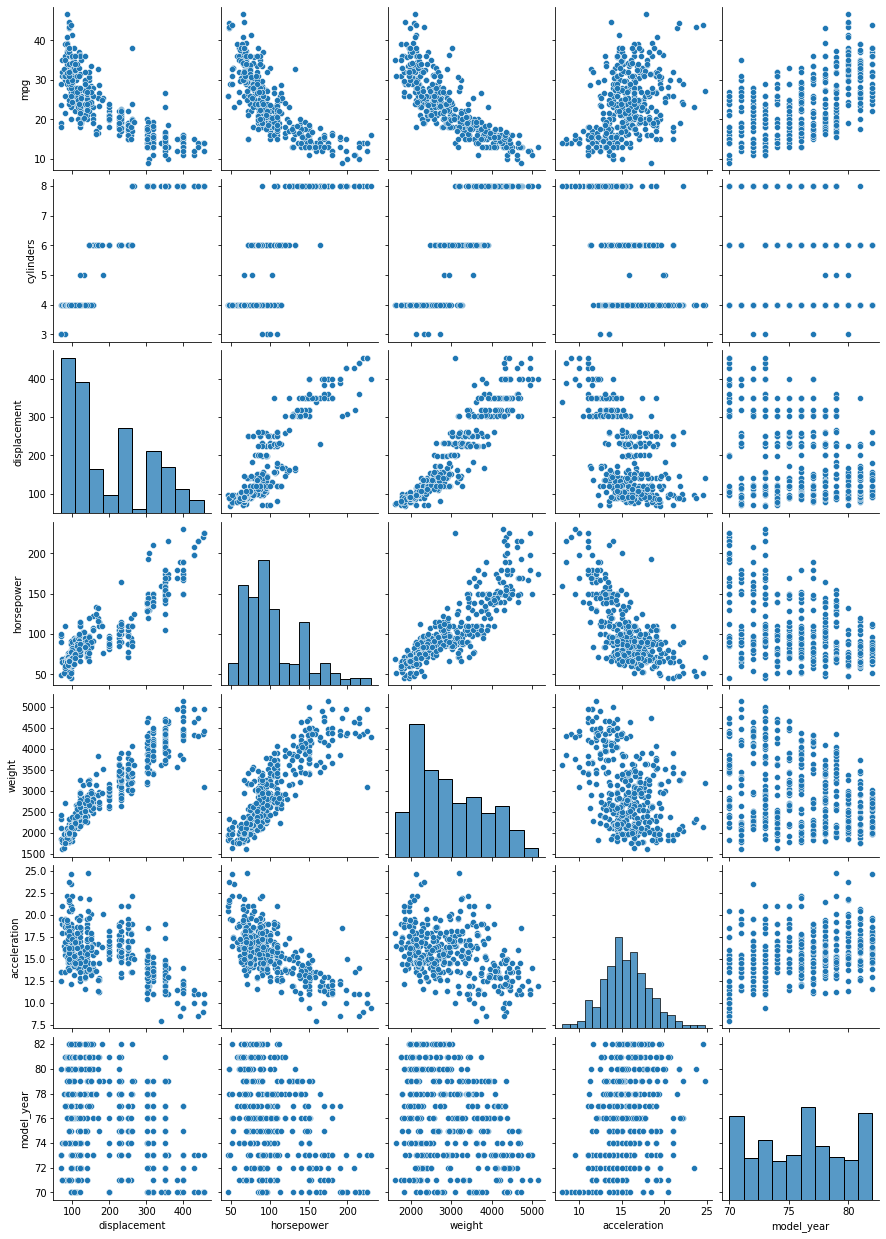

In [86]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','model_year'])

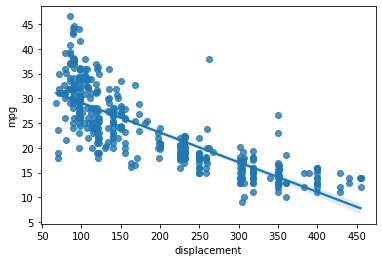

In [87]:
sns.regplot(x = 'displacement',y = 'mpg',data = df);

Data Target Variable y and Feature x

In [88]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [89]:
y = df['mpg']

In [90]:
y.shape

(392,)

In [91]:
X = df[['displacement','horsepower','weight','acceleration','model_year']]

In [92]:
X.shape

(392, 5)

Scaling Data

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
ss = StandardScaler()

In [95]:
X = ss.fit_transform(X)

In [96]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  , -1.62531533],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362, -1.62531533],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924, -1.62531533],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ,  1.63640964],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813,  1.63640964],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312,  1.63640964]])

In [97]:
pd.DataFrame(X).describe()

,0,1,2,3,4
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16,-9.754102e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00


Train Test Split Data

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=162529)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 5), (118, 5), (274,), (118,))

Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
lr.intercept_

23.597625261352402

In [105]:
lr.coef_

array([ 0.290936  ,  0.22790079, -5.95794782,  0.25722345,  2.92456911])

Predict Test Data

In [106]:
y_pred = lr.predict(X_test)

In [107]:
y_pred

array([22.43266513, 11.45205073, 30.58581355, 30.9667891 , 21.0378903 ,
       28.08069459, 15.7129959 , 33.71533911, 16.28846243, 12.65742456,
       24.48286023, 19.73299623, 23.39754379, 22.39095862, 21.83512227,
       26.83400157, 32.37752161, 26.31830669, 25.71784566, 25.87568592,
       26.75047864, 28.68787755, 25.74157438,  9.81292037, 28.71777546,
       25.27438172, 20.50508692, 24.67520158, 30.30189545, 20.86695236,
       20.87918313, 25.12597216, 23.61845361, 32.52269138, 22.3946315 ,
       34.93449671, 30.71283937, 23.55975499, 25.48628774, 18.33510596,
       21.33461396, 26.17709863,  8.38531005, 29.48829622, 20.24863682,
       22.56719168,  7.84940051, 28.78048009, 17.29551875, 31.49993086,
       28.70396567, 25.46517211, 26.84158231, 21.4983035 , 16.79573468,
       22.22379316, 27.84463276, 24.34546323, 11.14077014, 25.02401422,
       25.98633205,  6.3468249 , 26.62520623, 13.62041335, 27.45895147,
       26.86418578, 20.49032861, 19.47694696, 22.27258831, 22.79

Model Accuracy

In [108]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [109]:
mean_absolute_error(y_test, y_pred)

2.2996657902404376

In [110]:
mean_absolute_percentage_error(y_test, y_pred)

0.10924381692106

In [111]:
r2_score(y_test, y_pred)

0.7990536445155967

Polynomial Regression

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)

In [114]:
X_train2 = poly.fit_transform(X_train)

In [115]:
X_test2 = poly.fit_transform(X_test)

In [116]:
lr.fit(X_train2, y_train)

LinearRegression()

In [117]:
lr.intercept_

21.128607805070544

In [118]:
lr.coef_

array([-1.13658507, -2.887658  , -3.91758879, -0.92387182,  2.70822991,
       -1.82854072,  1.35526352, -0.73442193,  0.37055615,  1.9510645 ,
       -0.88460277, -0.75382195,  1.07134801, -0.22067282,  0.64178643])

In [119]:
y_pred_poly = lr.predict(X_test2)

Import data

In [120]:
from sklearn.datasets import load_digits

In [121]:
df = load_digits()

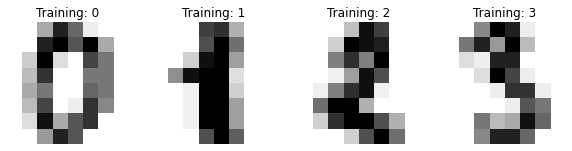

In [122]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title("Training: %i" % label)

Data Preprocessing

Fatten Image

In [123]:
df.images.shape

(1797, 8, 8)

In [124]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [125]:
df.images[0].shape

(8, 8)

In [126]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [127]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [128]:
data[0].shape

(64,)

In [129]:
data.shape

(1797, 64)

Scaling Data

In [130]:
data.min()

0.0

In [131]:
data.max()

16.0

In [132]:
data = data/16

In [133]:
data.min()

0.0

In [134]:
data.max()

1.0

Train Test Split Data

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.7, random_state=162529)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

Random Forest Model

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier()

In [140]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Test Data

In [141]:
y_pred = rf.predict(X_test)

In [142]:
y_pred

array([9, 8, 8, ..., 4, 7, 5])

Model Accuracy

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
confusion_matrix(y_test, y_pred)

array([[129,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 123,   0,   1,   0,   2,   0,   0,   1,   3],
       [  0,   0, 118,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0, 116,   0,   1,   0,   3,   3,   0],
       [  0,   0,   0,   0, 124,   0,   1,   3,   1,   0],
       [  0,   0,   0,   1,   0, 121,   1,   0,   0,   2],
       [  1,   0,   0,   0,   1,   0, 126,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   1],
       [  0,   5,   0,   0,   0,   1,   1,   0, 109,   1],
       [  0,   0,   0,   3,   0,   2,   0,   6,   1, 121]])

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       131
           1       0.96      0.95      0.95       130
           2       1.00      0.98      0.99       120
           3       0.96      0.94      0.95       123
           4       0.98      0.96      0.97       129
           5       0.95      0.97      0.96       125
           6       0.98      0.98      0.98       128
           7       0.91      0.99      0.95       122
           8       0.93      0.93      0.93       117
           9       0.95      0.91      0.93       133

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258

